<a href="https://colab.research.google.com/github/aastha2003gupta/roadmap_to_ml/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODELS

Linear regression

**Linear Regression:**

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
class linear_regression:
#initiating the parameters
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations
#
  def fit(self,x,y):
    #number of training examples and training features
    self.m,self.n=x.shape #number of rows and columns
    #initiating the weight and bias
    self.w=np.zeros(self.n)
    self.b=0
    self.x=x
    self.y=y
    #implementating gradient descent
    for i in range (self.no_of_iterations):
      self.update_weights()



  def update_weights(self):
    y_predict=self.predict(self.x)
    #calculating gradient
    dw=-(2*(self.x.T).dot(self.y-y_predict))/self.m
    db= -2*np.sum(self.y-y_predict)/self.m
    #update the weights
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db


  def predict(self,x):
    return x.dot(self.w) +self.b


Implementing linear regression

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df1=pd.read_csv('/content/salary_data.csv')
df1.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
#data preprocessing
df1.shape


(30, 2)

In [ ]:
df1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
#splitting feature and target
x=df1.iloc[:,:-1].values
y=df1.iloc[:,1].values

In [ ]:
#split in train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

In [ ]:
#training linear regression model
model=linear_regression(learning_rate=0.02,no_of_iterations=1000)


In [ ]:
#fitting
model.fit(x=x_train,y=y_train)

In [ ]:
#printing parameter values
print('weight', model.w[0])
print('bias',model.b)

weight 9514.400999035135
bias 23697.406507136307


In [ ]:
#y=9514(x)+23697
test_data_prediction=model.predict(x_test)

In [ ]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


visualization

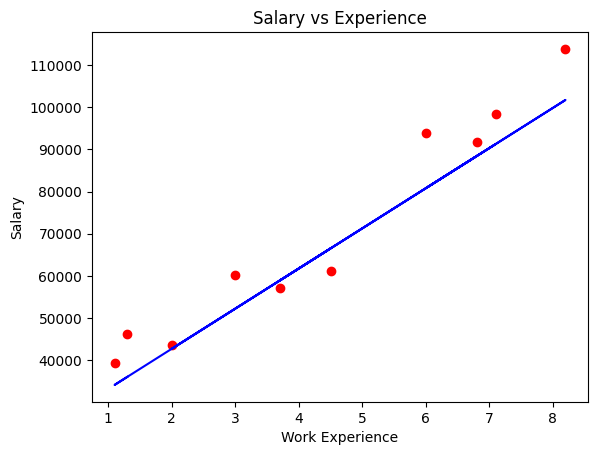

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,test_data_prediction,color='blue')
plt.xlabel( 'Work Experience' )
plt.ylabel( 'Salary' )
plt.title( 'Salary vs Experience' )
plt.show()


LOGISTIC REGRESSION

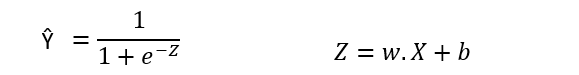

Y_hat --> predicted value

X --> Input Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Derivatives:

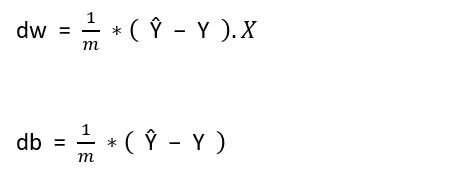

In [ ]:
class logistic_regression():
  def __init__(self,learning_rate, no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,x,y):
    self.m,self.n=x.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.x=x
    self.y=y
    for i in range (self.no_of_iterations):
      self.updates_weights()


  def updates_weights(self):
    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))

    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))
    db = (1/self.m)*np.sum(Y_hat - self.Y)

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self,x):
    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred



In [ ]:
df2=pd.read_csv('/content/diabetes (1).csv')
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df2.shape

(768, 9)

In [ ]:
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df2['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0:non diabetic , 1 diabetic

In [ ]:
df2.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
features=df2.drop(columns='Outcome',axis=1)
target=df2['Outcome']

In [ ]:
#data standardization
scaler=StandardScaler()
scaler.fit(features)
standardized_data=scaler.transform(features)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.2, random_state=2)

In [ ]:
classifier = logistic_regression(learning_rate=0.01, no_of_iterations=1000)

In [ ]:
classifier.fit(X_train, Y_train)

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7768729641693811


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7662337662337663


In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Support Vector Machine

**Equation of the Hyperplane:**

y = wx - b

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function

In [ ]:
class SVM_classifier():
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  def fit(self,x,y):
    self.m,self.n=x.shape
    self.w=np.zeros(self.n)
    self.b=0
    self.x=x
    self.y=y

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    y_label = np.where(self.y <= 0, -1, 1)

    for index,x_i in enumerate(self.x):
      condition=y_label[index]*(np.dot(x_i, self.w)-self.b)>=1
      if(condition==True):
        dw=2*self.lambda_parameter*self.w
        db=0
      else:
        dw=2*self.lambda_parameter*self.w-np.dot(x_i, y_label[index])
        db=y_label[index]

    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  def predict(self,x):
    output=np.dot(x,self.w)-self.b
    predicted_labels=np.sign(output)
    y_hat = np.where(predicted_labels <= -1, 0, 1)
    return y_hat





In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
features = df2.drop(columns='Outcome', axis=1)

target = df2['Outcome']


In [ ]:
scaler = StandardScaler()
scaler.fit(features)



StandardScaler()

In [ ]:
standardized_data = scaler.transform(features)

In [ ]:
features = standardized_data
target = df2['Outcome']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state = 2)

In [ ]:
#using diabetes dataset , preprocessing done in logistic_regression
svm_classifier=SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)

In [ ]:
svm_classifier.fit(X_train,Y_train)

In [ ]:
X_train_prediction = svm_classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print(training_data_accuracy)

0.6677524429967426


In [ ]:
X_test_prediction = svm_classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print(test_data_accuracy)

0.6103896103896104


In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = svm_classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')

else:
  print('The Person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The Person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Lasso Regression

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Gradient for Weights

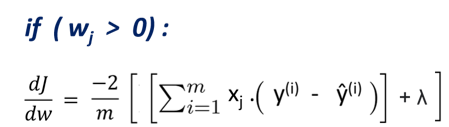
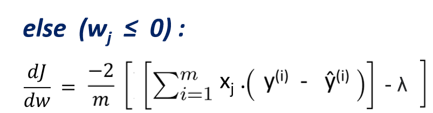

Gradient for Bias
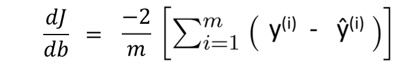

In [ ]:
class lasso_regression():
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  def fit(self,x,y):
    self.m,self.n=x.shape
    self.w=np.zeros(self.n)
    self.b=0
    self.x=x
    self.y=y

    for i in range(self.no_of_iterations):
      self.update_weights()



  def update_weights(self):
    y_pred=self.predict(self.x)
    # gradient for weight
    dw = np.zeros(self.n)
    for i in range(self.n):
      if self.w[i]>0:
        dw=(-2/self.m)*(((self.x[:,i]).dot(self.y - y_pred)) + self.lambda_parameter)
      else:
        dw=(-2/self.m)*(((self.x[:,i]).dot(self.y - y_pred)) - self.lambda_parameter)
      db=- 2 * np.sum(self.y - y_pred) / self.m
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  def predict(self,x):
    return x.dot(self.w) +self.b



K nearest neighbour

Distance calculation

Euclidean Distance
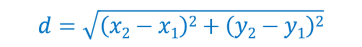

In [ ]:
# consider two points with 2 dimensions
p1 = (1,1)
p2 = (2,2)

In [ ]:
#calculate euclidean distance
dist = (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2
euclidean_distance=np.sqrt(dist)
print(euclidean_distance)

1.4142135623730951


In [ ]:
# consider two points with 3 dimensions
p1 = (1,1,1)
p2 = (2,2,2)

# calculating Euclidean Distance

dist = (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2

euclidean_dist = np.sqrt(dist)
print(euclidean_dist)

1.7320508075688772


In [ ]:
# consider two points with 4 dimensions
p1 = (1,1,1,1)
p2 = (2,2,2,2)

dist = 0

for i in range(len(p1)):
  dist = dist + (p1[i] - p2[i])**2

euclidean_dist = np.sqrt(dist)
print(euclidean_dist)

In [ ]:
#function for calculating euclidean distance
def get_euclidean_distance(p1, p2):

  dist = 0

  for i in range(len(p1)):
    dist = dist + (p1[i] - p2[i])**2

  euclidean_dist = np.sqrt(dist)
  print(euclidean_dist)

In [ ]:
get_euclidean_distance((1,1,1), (2,2,2))

1.7320508075688772


Manhattan distance
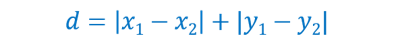

In [ ]:
def get_manhattan_distance(p1, p2):

  dist = 0

  for i in range(len(p1)):
    dist = dist + abs(p1[i] - p2[i])

    manhattan_dist = dist

  print(manhattan_dist)

In [ ]:
get_manhattan_distance((1,1,1,1),(2,2,2,2))

4


Model

In [ ]:
import statistics

In [ ]:
class knn_classifier:
  def __init__(self,distance_metric):
    self.distance_metric=distance_metric

  def get_distance_metric(self,training_data_point, test_data_point):
    if (self.distance_metric == 'euclidean'):

      dist = 0
      for i in range(len(training_data_point) - 1):
        dist = dist + (training_data_point[i] - test_data_point[i])**2

      euclidean_dist = np.sqrt(dist)

      return euclidean_dist

    elif(self.distance_metric == 'manhattan'):
      dist=0
      for i in range(len(training_data_point) - 1):
        dist = dist + abs(training_data_point[i] - test_data_point[i])

      manhattan_dist = dist
      return manhattan_dist

  def nearest_neighbors(self,X_train, test_data, k):
    distance_list = []

    for training_data in X_train:

      distance = self.get_distance_metric(training_data, test_data)
      distance_list.append((training_data, distance))

    distance_list.sort(key=lambda x: x[1])
    neighbors_list=[]
    for j in range(k):
      neighbors_list.append(distance_list[j][0])

    return neighbors_list


  def predict(self,X_train, test_data, k):
    neighbors = self.nearest_neighbors(X_train, test_data, k)
    for data in neighbors:
      label = []
      label.append(data[-1])

    predicted_class = statistics.mode(label)

    return predicted_class

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df3=pd.read_csv('/content/diabetes (1).csv')

In [ ]:
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df3.drop(columns='Outcome', axis = 1)
Y = df3['Outcome']

In [ ]:
X = X.to_numpy()
Y = Y.to_numpy()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
X_train = np.insert(X_train, 8, Y_train, axis=1)

In [ ]:
classifier = knn_classifier(distance_metric='manhattan')

In [ ]:
prediction = classifier.predict(X_train, X_test[2], k=5)

In [ ]:
X_test_size = X_test.shape[0]
print(X_test_size)

154


In [ ]:
y_pred = []

for i in range(X_test_size):
  prediction = classifier.predict(X_train, X_test[i], k=5)
  y_pred.append(prediction)

In [ ]:
y_true = Y_test

In [ ]:
accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy*100)

74.02597402597402


Decision tree

Post pruning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
import seaborn as sns
df=sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X=df.iloc[:,:-1]
y=iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
treemodel=DecisionTreeClassifier(max_depth=2)

In [ ]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

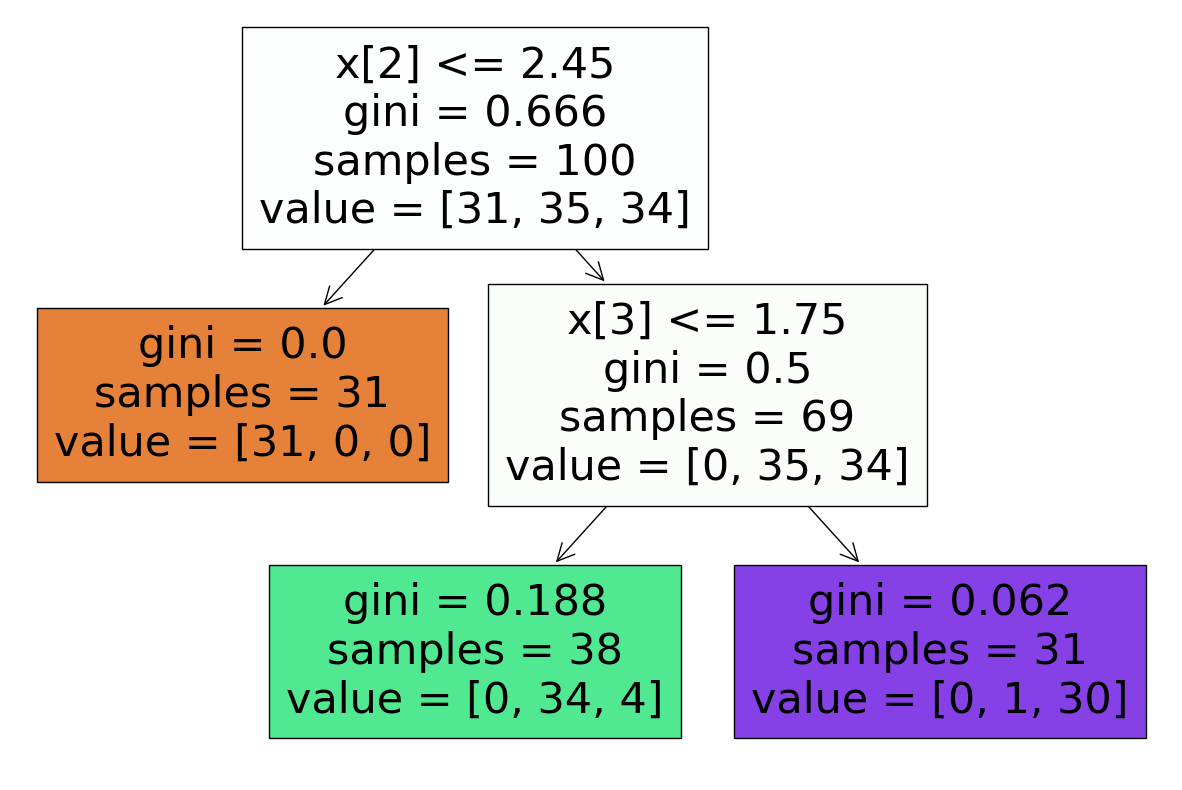

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred=treemodel.predict(X_test)

NotFittedError: ignored

In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report


In [ ]:
score=accuracy_score(y_pred,y_test)
print(score)

0.98


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Decision tree with prepruning

In [ ]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')


In [ ]:
cv.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_


{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [ ]:
y_pred=cv.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
score=accuracy_score(y_pred,y_test)


In [ ]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Naive Bayes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
